<a href="https://colab.research.google.com/github/kaikai23/Covid19-Group15-BigDataAnalytics/blob/main/Covid_19Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading the Covid-19 Dataset and have a simple look at the data:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
94651,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,2635.282,1.615,2.259,107.987,0.000,0.106,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932.0,561819.0,37.800,0.130,1914.0,0.129,0.018,57.0,tests performed,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94652,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,2636.695,1.413,2.355,108.054,0.067,0.115,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048.0,562867.0,37.871,0.071,1955.0,0.132,0.018,55.9,tests performed,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94653,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,2639.991,3.297,2.662,108.390,0.336,0.163,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94654,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,2645.576,5.584,3.105,108.794,0.404,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94655,ZWE,Africa,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,2653.044,7.468,3.854,109.131,0.336,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


# **Dataset Description and Processng/Cleaning**

In the dataset, smoothed data such as smoothed new cases and smoothed new deaths are calculated as the average of the last 7 days. For countries that don't report testing data and vaccination data on a daily basis, they are assumed to changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. Positive rate is the share of COVID-19 tests that are positive, given as a rolling 7-day average, which is the inverse of tests per case.<br/>
Stringency index composite governments' measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response). Population density is the number of people divided by land area, measured in square kilometers. The share of the population that is 65 years and older is used as aged 65 older index. Cardiovasc death rate and diabetes prevalence describes the death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) and diabetes prevalence (% of population aged 20 to 79) in 2017, respectively. Handwashing facilities index is the share of the population with basic handwashing facilities on premises.<br/>
GDP per capita is the gross domestic product at purchasing power parity (constant 2011 international dollars). Extreme poverty index describes the share of the population living in extreme poverty. Human development index is a composite index measuring average achievement in three basic dimensions of human development — a long and healthy life, knowledge and a decent standard of living.<br/>
It is important to note that there are two different concepts in the dataset, the number of vaccines owned by the country or region and the number of people vaccinated in the country or region. In the early days, there were cases where countries or regions had vaccines but did not vaccinate the masses. There are also countries or regions that have vaccines that are not fully used by the population.<br/>
On December 15, 2020, the date when the database showed the first people in the world to receive the COVID-19 vaccine was chosen as the starting point for the observation of the data for the analysis of the vaccine on the epidemic. When performing analyses related to vaccines, data prior to December 15, 2020 were generally not considered because there were no records of vaccination prior to that date. Subsequently, all data where the number of people vaccinated was blank were given a 0.<br/>
**Please note that some data preprocessing are also done in the modelling part. Please refer to "Model building--Produce training validation and testing data"**

**Arributes of each column and their valid records:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94656 entries, 0 to 94655
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               94656 non-null  object 
 1   continent                              90185 non-null  object 
 2   location                               94656 non-null  object 
 3   date                                   94656 non-null  object 
 4   total_cases                            91559 non-null  float64
 5   new_cases                              91556 non-null  float64
 6   new_cases_smoothed                     90546 non-null  float64
 7   total_deaths                           81588 non-null  float64
 8   new_deaths                             81744 non-null  float64
 9   new_deaths_smoothed                    90546 non-null  float64
 10  total_cases_per_million                91070 non-null  float64
 11  ne

# **Exploratory Data Analysis**

**Statistics of this dataset:**

In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.155900e+04,91556.000000,90546.000000,8.158800e+04,81744.000000,90546.000000,91070.000000,91067.000000,90062.000000,81112.000000,81268.000000,90062.000000,76127.000000,9514.000000,9514.000000,11810.000000,11810.000000,861.000000,861.000000,1496.000000,1496.000000,4.264200e+04,4.233500e+04,42335.000000,42642.000000,4.943600e+04,49436.000000,46602.000000,46003.000000,1.399200e+04,1.319600e+04,1.043200e+04,1.170600e+04,2.411300e+04,13992.000000,13196.000000,10432.000000,24113.000000,79888.000000,9.403300e+04,88007.000000,84821.000000,83865.000000,84351.000000,85107.000000,57524.000000,85213.000000,87273.000000,66697.000000,65720.000000,42808.000000,77677.000000,89886.000000,85377.000000,3344.000000
mean,9.784269e+05,6057.723000,6087.444522,2.695429e+04,146.856858,131.624047,12022.333532,76.103579,76.455377,269.698262,1.562355,1.400363,1.006635,1090.637902,27.036397,4779.840220,174.353274,263.849706,18.555899,3544.367828,90.571594,4.642596e+04,7.069501e+06,281.157982,2.061621,4.410040e+04,1.970404,0.088752,161.409206,2.409622e+07,1.304478e+07,7.319786e+06,5.769301e+05,2.795793e+05,19.960923,13.382314,7.941950,3092.451126,58.556491,1.257171e+08,382.951949,30.572745,8.796292,5.569450,19291.439561,13.384485,258.230468,7.905022,10.554461,32.681016,50.860077,3.028804,73.233150,0.727618,18.177156
std,6.740115e+06,38084.835915,37844.741642,1.605199e+05,802.303895,743.582105,22484.417774,198.004563,158.786671,493.164593,3.993422,3.050525,0.352242,2949.084109,27.505056,12110.973431,213.710120,577.423146,36.170046,11010.937100,215.518641,1.719561e+05,3.118741e+07,648.163105,5.885175,1.552717e+05,4.948690,0.096982,887.215930,1.215268e+08,5.759429e+07,3.128562e+07,2.615222e+06,1.747215e+06,27.439458,16.857038,12.082649,4481.377516,21.188098,6.828473e+08,1782.919125,9.131847,6.215556,4.240414,19973.566709,19.953150,118.934419,4.112631,10.446066,13.478014,31.760567,2.460220,7.561919,0.150391,36.279736
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.140000e+03,2.000000,7.286000,5.100000e+01,0.000000,0.000000,239.011750,0.207000,1.252000,7.702000,0.000000,0.000000,0.840000,32.000000,4.793000,120.000000,23.795000,2.254000,0.604000,7.373750,2.616750,1.565000e+03,1.467400e+05,13.143500,0.135000,1.638000e+03,0.134000,0.017000,7.800000,9.337225e+04,7.293400e+04,3.852575e+04,4.003500e+03,8.450000e+02,1.

**A histogram for each attribute(column)**<br/>
Note that these are only histogram which shows the occurences of the attribute values, some of them are not meaningful. 

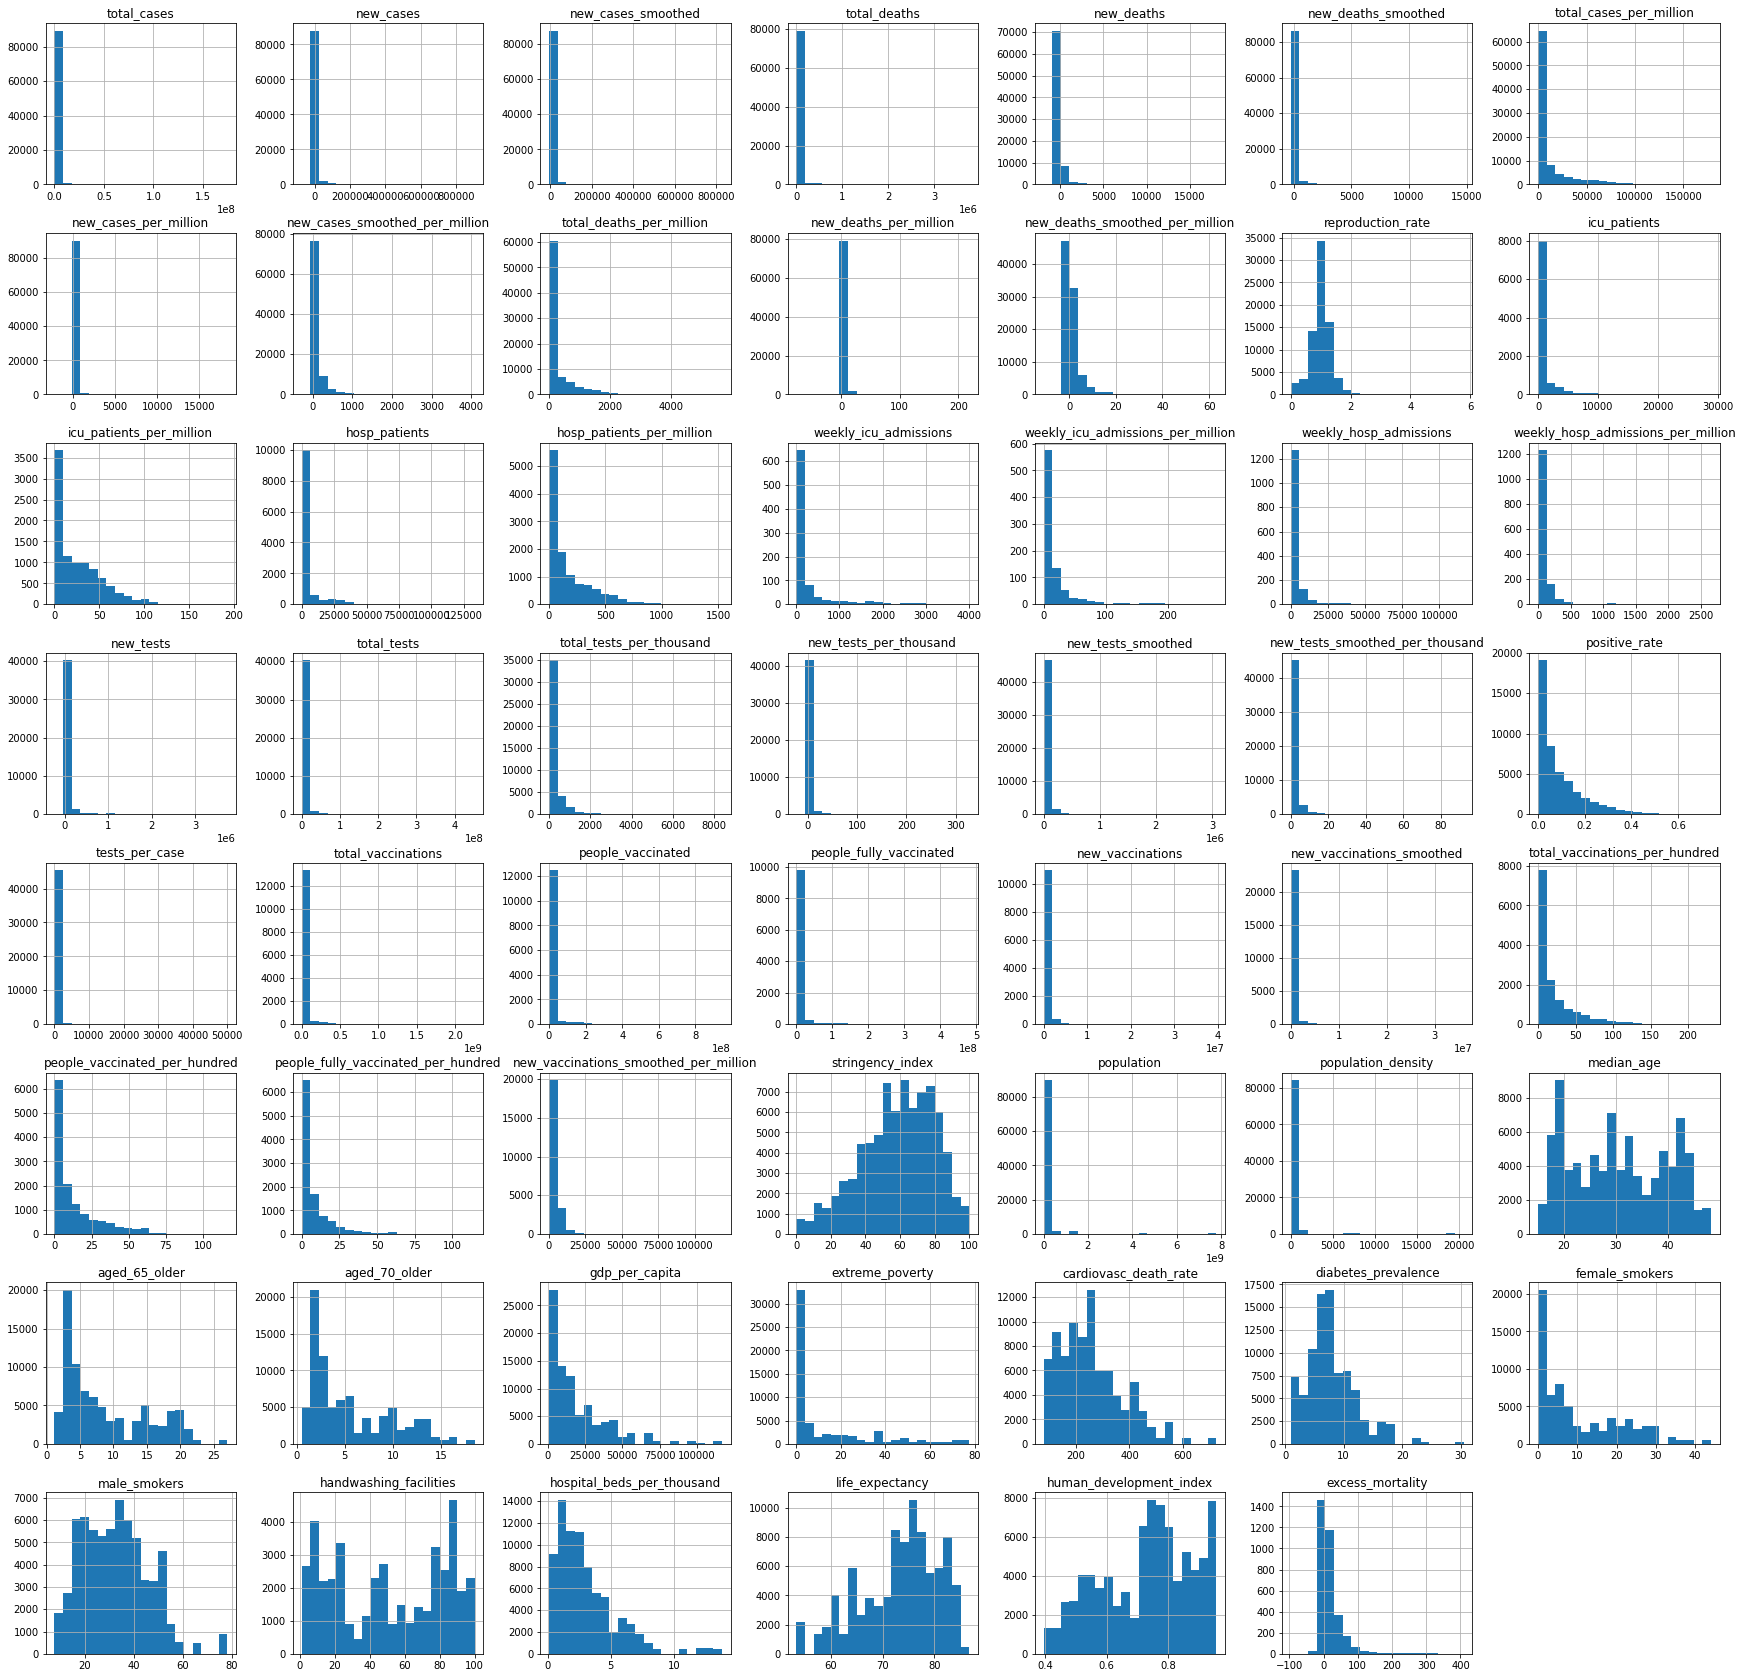

In [5]:
df.hist(bins=20, figsize=(30,30))
plt.show()

**Number of records(days) for each location:**<br/>
We can see that for some countries(areas), the available records are very rare. E.g. "British Virgin Islands" has only 8 records (which means only 8 days are recorded), and we are removing these data before we feed them to our model.

In [6]:
iso_dic={}
for i in range(len(df)):
  if df['location'][i] in iso_dic: iso_dic[df['location'][i]]=iso_dic[df['location'][i]]+1
  else: iso_dic[df['location'][i]]=1
iso_dic

{'Afghanistan': 472,
 'Africa': 483,
 'Albania': 471,
 'Algeria': 471,
 'Andorra': 465,
 'Angola': 447,
 'Anguilla': 121,
 'Antigua and Barbuda': 454,
 'Argentina': 526,
 'Armenia': 466,
 'Aruba': 73,
 'Asia': 505,
 'Australia': 501,
 'Austria': 471,
 'Azerbaijan': 466,
 'Bahamas': 451,
 'Bahrain': 472,
 'Bangladesh': 464,
 'Barbados': 450,
 'Belarus': 468,
 'Belgium': 492,
 'Belize': 444,
 'Benin': 451,
 'Bermuda': 149,
 'Bhutan': 461,
 'Bolivia': 456,
 'Bonaire Sint Eustatius and Saba': 1,
 'Bosnia and Herzegovina': 462,
 'Botswana': 437,
 'Brazil': 470,
 'British Virgin Islands': 8,
 'Brunei': 458,
 'Bulgaria': 459,
 'Burkina Faso': 457,
 'Burundi': 436,
 'Cambodia': 500,
 'Cameroon': 461,
 'Canada': 501,
 'Cape Verde': 447,
 'Cayman Islands': 165,
 'Central African Republic': 452,
 'Chad': 448,
 'Chile': 473,
 'China': 505,
 'Colombia': 461,
 'Comoros': 406,
 'Congo': 452,
 'Cook Islands': 15,
 'Costa Rica': 461,
 "Cote d'Ivoire": 456,
 'Croatia': 471,
 'Cuba': 455,
 'Curacao': 73,

**The list of countries(plus the number of days recorded) where the highest infection rates ever exceeded 10%:**<br/>
These countries are 'Andorra', 'Bahrain', 'Czechia', 'Lithuania', 'Luxembourg', 'Maldives', 'Montenegro', 'San Marino', 'Serbia', 'Seychelles', 'Slovenia', 'Sweden', and 'United States'.

In [7]:
countries={}
for i in range(len(df)):
  if df['total_cases_per_million'][i]>100000 and df['location'][i] not in countries:
    countries[df['location'][i]]=len(df[df['location']==df['location'][i]])
print(countries)

{'Andorra': 465, 'Bahrain': 472, 'Czechia': 466, 'Lithuania': 467, 'Luxembourg': 472, 'Maldives': 459, 'Montenegro': 450, 'San Marino': 469, 'Serbia': 470, 'Seychelles': 453, 'Slovenia': 494, 'Sweden': 495, 'United States': 505}


**A concrete case study: United States**

Number of records(days) for US:

In [8]:
df_us=df[df['location']=='United States']
len(df_us)

505

Graph: Total number of infected people:

([], <a list of 0 Text major ticklabel objects>)

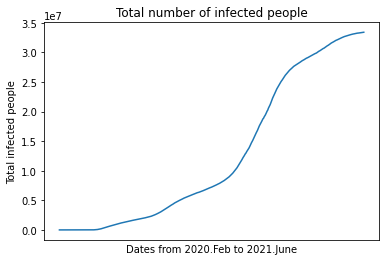

In [9]:

plt.plot(df_us['date'],df_us['total_cases'])
plt.xlabel('Dates from 2020.Feb to 2021.June')
plt.ylabel('Total infected people')
plt.title('Total number of infected people')
plt.xticks([])

Graph: New Cases per day:

([], <a list of 0 Text major ticklabel objects>)

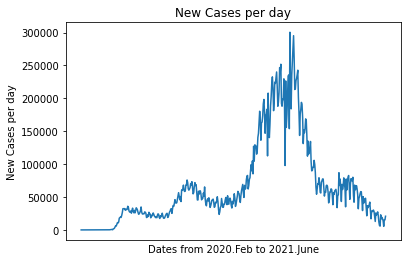

In [10]:
plt.plot(df_us['date'],df_us['new_cases'])
plt.xlabel('Dates from 2020.Feb to 2021.June')
plt.ylabel('New Cases per day')
plt.title('New Cases per day')
plt.xticks([])

Graph: New Cases per day (smoothed):

([], <a list of 0 Text major ticklabel objects>)

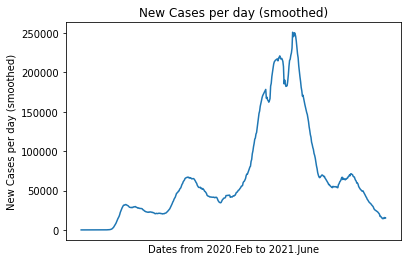

In [11]:
plt.plot(df_us['date'],df_us['new_cases_smoothed'])
plt.xlabel('Dates from 2020.Feb to 2021.June')
plt.ylabel('New Cases per day (smoothed)')
plt.title('New Cases per day (smoothed)')
plt.xticks([])

Graph: Possible variables that can affect the transition of covid-19:

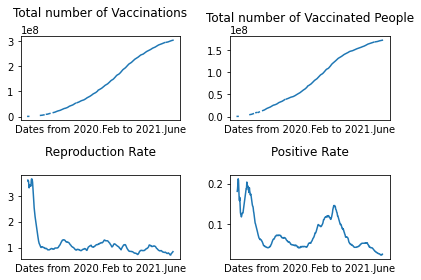

In [12]:
fig,axs=plt.subplots(2,2)
axs[0,0].plot(df_us['date'],df_us['total_vaccinations'])
axs[0,0].set_title('Total number of Vaccinations',pad=20)
axs[0,0].set(xlabel='Dates from 2020.Feb to 2021.June',ylabel='')
axs[0,0].set_xticks([])
axs[0,1].plot(df_us['date'],df_us['people_vaccinated'])
axs[0,1].set_title('Total number of Vaccinated People',pad=15)
axs[0,1].set(xlabel='Dates from 2020.Feb to 2021.June',ylabel='')
axs[0,1].set_xticks([])
axs[1,0].plot(df_us['date'],df_us['reproduction_rate'])
axs[1,0].set_title('Reproduction Rate',pad=20)
axs[1,0].set(xlabel='Dates from 2020.Feb to 2021.June',ylabel='')
axs[1,0].set_xticks([])
axs[1,1].plot(df_us['date'],df_us['positive_rate'])
axs[1,1].set_title('Positive Rate',pad=20)
axs[1,1].set(xlabel='Dates from 2020.Feb to 2021.June',ylabel='')
axs[1,1].set_xticks([])
plt.tight_layout()

**At first we are very interested in using the Reproduction Rate to predict the pandemic, but later on we dropped this idea for following reasons:**<br/>
1.We can see from above figures that the reproduction rate droped suddenly and drastically when the Vaccination first came out, which sounds reasonable. But if we think about it more carefully, it shouldn't behave like this because there were very few people vaccinated when the vaccination first came out.<br/>
2.The Reproduction Rate in US kept slow even when where were more than 200,000 people infected per day in US, which is not reasonable.<br/>
3.Anyway, the Reproduction Rate is not a truly existing data but estimated from otherexisting data. So it can introduce uncontroable bias and errors which we can do nothing to revise.

# **Model building**

##**Ideas and designs of the model**

**Objective:** Our objective is to predict the newly infected number per day for any given area.<br/><br/>
**Ideas and thinking:** The "new infected cases per day" itself is a time series, so we can predict it without using any other data just like predicting the stock. E.g. using an ARMA model to predict stock value in the future. But as for this dataset, we have a lot of other informations that we can use, so we can incorporate some other useful information to help predict the number of newly infected people, e.g. number of vaccinated people. And by comparing among all the variables (also see Exploratory Data Analysis), we picked out the following variables to use.<br/><br/>
**Input variables:**<br/>
(1)“total infected people”(**1 scalar** taking the average of past 15 days)<br/>
(2)“New cases per day(smoothed)” of past 15days( **a vector of 15 scalars**)<br/>
(3)“Vaccinated people”(**1 scalar** taking the average of past 15 days)<br/>
(4)“Population” (**1 scalar**)<br/>
In the end the input variables can be unified into **a vector of length 18.**<br/><br/>
**Output/Predicted variable:**<br/>
"New cases of infection" for tomorrow (in the next day). **It is a scalar.**<br/><br/>
**Model Design:**<br/>
A simple multilayer perceptron taking 18 inputs and outputting 1 scalar, with 2 hidden layer of 18 neurons.

##**Produce training validation and testing data**

In [13]:
df.shape

(94656, 60)

**Drop all data records which don't have a record for vaccination number:**

In [14]:
df=df.drop(np.where(df['people_vaccinated'].isnull())[0])
print(df.shape)


(13196, 60)


**Drop a country's (area's) data if it has less than 20 records:**

In [15]:
iso_dic={}
for i in range(len(df)):
  if df.iat[i,2] in iso_dic: iso_dic[df.iat[i,2]]=iso_dic[df.iat[i,2]]+1
  else: iso_dic[df.iat[i,2]]=1

In [16]:
for key,value in iso_dic.items():
  #print(key)
  if value<20:
    df=df.drop(df[df['location']==key].index)

In [17]:
df.shape

(12504, 60)

**Making the input/output pairs:**

In [18]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
803,OWID_AFR,NaN,Africa,2021-01-09,3024481.0,35099.0,30485.000,72117.0,657.0,782.286,2256.068,26.182,22.740,53.795,0.490,0.584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,OWID_AFR,NaN,Africa,2021-01-13,3144246.0,33997.0,32391.286,75688.0,1220.0,832.429,2345.405,25.360,24.162,56.458,0.910,0.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0,NaN,NaN,500.0,0.00,0.00,NaN,0.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,OWID_AFR,NaN,Africa,2021-01-15,3210049.0,31575.0,31523.857,77646.0,905.0,883.714,2394.490,23.553,23.515,57.919,0.675,0.659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,4000.0,NaN,NaN,667.0,0.00,0.00,NaN,0.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,OWID_AFR,NaN,Africa,2021-01-16,3237617.0,27568.0,30448.000,78309.0,663.0,884.571,2415.054,20.564,22.712,58.413,0.495,0.660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,7000.0,NaN,3000.0,1000.0,0.00,0.00,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,OWID_AFR,NaN,Africa,2021-01-19,3310072.0,23410.0,28546.143,80834.0,1202.0,909.429,2469.101,17.462,21.294,60.297,0.897,0.678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10976.0,10976.0,NaN,NaN,1354.0,0.00,0.00,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94651,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,2635.282,1.615,2.259,107.987,0.000,0.106,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932.0,561819.0,37.800,0.130,1914.0,0.129,0.018,57.0,tests performed,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0,48.15,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94652,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,2636.695,1.413,2.355,108.054,0.067,0.115,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048.0,562867.0,37.871,0.071,1955.0,0.132,0.018,55.9,tests performed,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0,48.15,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94653,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,2639.991,3.297,2.662,108.390,0.336,0.163,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [33]:
df[df['location']=='Africa'].iat[142,44]

1340598113.0

In [20]:
df[df['location']=='Africa'].head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
803,OWID_AFR,NaN,Africa,2021-01-09,3024481.0,35099.0,30485.000,72117.0,657.0,782.286,2256.068,26.182,22.740,53.795,0.490,0.584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,OWID_AFR,NaN,Africa,2021-01-13,3144246.0,33997.0,32391.286,75688.0,1220.0,832.429,2345.405,25.360,24.162,56.458,0.910,0.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0,NaN,NaN,500.0,0.00,0.0,NaN,0.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,OWID_AFR,NaN,Africa,2021-01-15,3210049.0,31575.0,31523.857,77646.0,905.0,883.714,2394.490,23.553,23.515,57.919,0.675,0.659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,4000.0,NaN,NaN,667.0,0.00,0.0,NaN,0.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,OWID_AFR,NaN,Africa,2021-01-16,3237617.0,27568.0,30448.000,78309.0,663.0,884.571,2415.054,20.564,22.712,58.413,0.495,0.660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,7000.0,NaN,3000.0,1000.0,0.00,0.0,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,OWID_AFR,NaN,Africa,2021-01-19,3310072.0,23410.0,28546.143,80834.0,1202.0,909.429,2469.101,17.462,21.294,60.297,0.897,0.678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10976.0,10976.0,NaN,NaN,1354.0,0.00,0.0,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,OWID_AFR,NaN,Africa,2021-01-20,3338409.0,28337.0,27737.571,81756.0,922.0,866.857,2490.238,21.138,20.690,60.985,0.688,0.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13163.0,13163.0,NaN,2187.0,1595.0,0.00,0.0,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,OWID_AFR,NaN,Africa,2021-01-22,3392453.0,26179.0,26057.714,83755.0,974.0,872.714,2530.552,19.528,19.437,62.476,0.727,0.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16890.0,16890.0,NaN,NaN,1841.0,0.00,0.0,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,OWID_AFR,NaN,Africa,2021-01-23,3419761.0,27308.0,26020.571,84537.0,782.0,889.714,2550.922,20.370,19.410,63.059,0.583,0.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18353.0,18353.0,NaN,1463.0,1622.0,0.00,0.0,NaN,1.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,OWID_AFR,NaN,Africa,2021-01-24,3439881.0,20120.0,25099.286,85184.0,647.0,896.714,2565.930,15.008,18.722,63.542,0.483,0.669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18353.0,18353.0,NaN,0.0,1433.0,0.00,

In [ ]:
iso_dic={}
for i in range(len(df)):
  if df.iat[i,2] in iso_dic: iso_dic[df.iat[i,2]]=iso_dic[df.iat[i,2]]+1
  else: iso_dic[df.iat[i,2]]=1
iso_dic

**Drop all the Nan values and create a input/output pairs:**

In [49]:
in_ou_pair=[]
for key,value in iso_dic.items():
  df_current = df[df['location']==key]
  for i in range(16,value):
    inputs=[]
    if np.isnan(df_current.iat[i-1,4]):
      continue
    inputs.append(df_current.iat[i-1,4])
    check=1
    for j in range(1,16):
      if np.isnan(df_current.iat[i-j,6]):
        check=0
      inputs.append(df_current.iat[i-j,6])
    inputs.append(df_current.iat[i-1,35])
    inputs.append(df_current.iat[i-1,44])
    inputs.append(df_current.iat[i,6])
    if check==1:
      in_ou_pair.append(inputs)
in_ou_pair=np.array(in_ou_pair)
print(in_ou_pair.shape)
    

(9974, 19)


In [35]:
in_ou_pair[0]

array([3.56961700e+06, 1.85337140e+04, 1.91577140e+04, 2.05071430e+04,
       2.15010000e+04, 2.25131430e+04, 2.35860000e+04, 2.42734290e+04,
       2.50992860e+04, 2.60205710e+04, 2.60577140e+04, 2.77375710e+04,
       2.85461430e+04, 3.04480000e+04, 3.15238570e+04, 3.23912860e+04,
       3.22060000e+04, 1.34059811e+09, 1.79645710e+04])

In [51]:
np.max(in_ou_pair,axis=0).shape

(19,)

**Split the data into train, validation and test data:**

In [25]:
df_train, df_validate, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print(f'Training size: {df_train.shape[0]}\nValidation size: {df_validate.shape[0]}\nTest size: {df_test.shape[0]}')

Training size: 7502
Validation size: 2501
Test size: 2501


# **Visualization and Report Findings**